In [47]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [48]:
# Load dataset
from sklearn import datasets

iris = datasets.load_iris()

#Remove virginica variety
indices = np.where(iris.target < 2)

#Create dataframe only to investigate
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df.dropna()
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [49]:
# iris.data holds the numerical values of the features
data = iris.data[indices]
target = iris.target[indices]

In [ ]:
#Comment line below to run decision boundaries

#data = data[:, :2]

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data=scaler.fit_transform(data)


In [51]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=255)

Run cells above this to reset

Choose 1 binary classifier to run

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

#Train the model
clf.fit(X_train, y_train)

# Predict the response from X test
y_pred = clf.predict(X_test)



In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

# Train the model
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [52]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)


Run cells below this to see accuracy scores

In [53]:
#Performance scores
from sklearn.metrics import accuracy_score

print("Accuracy score:",accuracy_score(y_test, y_pred))

Accuracy score: 1.0


In [54]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

print("Confusion Matrix accuracy:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix accuracy:
 [[12  0]
 [ 0  8]]


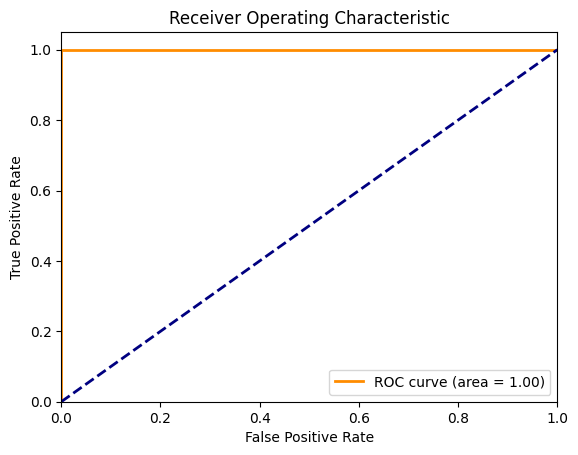

In [55]:
#ROC curve and AUC
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

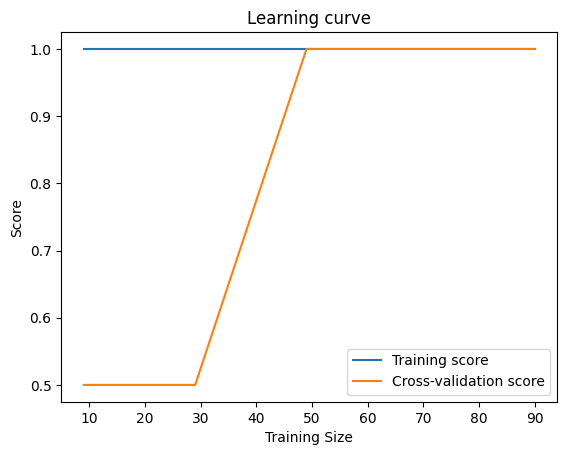

In [56]:
#Learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(clf, data, target, cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

Comment "data" line before running decision boundaries

In [57]:
#Decision boundaries line
# Plot decision boundaries
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

ValueError: X has 2 features, but RandomForestClassifier is expecting 4 features as input.

In [ ]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
print("Decision boundary probabilities:\n", Z)